In [1]:
import pandas as pd
import seaborn as sns
import sqlalchemy
import matplotlib.pyplot as plt

user='root'
host = "localhost"
port = 3306
password="Password"
dbname="intro"
engine = sqlalchemy.create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{dbname}')
conn = engine.connect()
print(conn)

In [18]:
df = pd.read_csv('C:\Projects\IDH\LeanderHuysmanOpenRefineFINAL.csv')
df.to_sql('sb_kadoc', conn, if_exists='replace')

conn.commit()

In [19]:
query = """ SELECT *
FROM sb_kadoc"""

pd.read_sql(query, conn)

,index,record_leader,1,8,35,40,System_control_number,245,Title_information,260,...,321,130,41,655,546,983,966,110,665,711
0,0,00704nas 2200217u 4500,9.920000e+15,991209q19791996be mr|p|| 0|||a|dut c,^$ $ $a(BeLVLBS)002101086LBS01-Aleph^$ $ $a815...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aKleine raak.,Kleine Raak,^$ $ $aZuun$ $ $bKWB. St. Lutgardis$ $ $c[1979...,...,None,None,None,None,None,None,None,None,None,None
1,1,00549nas 2200193u 4500,9.920000e+15,000107q19771999be qr|p|| 0|||a|dut c,^$ $ $a(BeLVLBS)002106547LBS01-Aleph^$ $ $a818...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aCCOD kontaktblad.,Ccod Kontaktblad,^$ $ $aAalst$ $ $bCCOD. Aalst$ $ $c[1977]-[1999],...,None,None,None,None,None,None,None,None,None,None
2,2,00702nas 2200217u 4500,9.920000e+15,000119q19781982be mr|p|| 0|||a|dut c,^$ $ $a(BeLVLBS)002110169LBS01-Aleph^$ $ $a820...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aStem der jongeren$ $ $bmaandelijks tijd...,"Stem Der Jongeren, Maandelijks Tijdschrift Van...",None,...,None,None,None,None,None,None,None,None,None,None
3,3,00707nas 2200229u 4500,9.920000e+15,000121q19791980be qr|p|| 0|||a|dut c,^$ $ $a(BeLVLBS)002111113LBS01-Aleph^$ $ $a820...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aKsalender.,Ksalender,^$ $ $aPoperinge$ $ $bKSA. Poperinge$ $ $c1979...,...,None,None,None,None,None,None,None,None,None,None
4,4,00683nas 2200217u 4500,9.920000e+15,000125d19799999be er|p|| 0|||a|dut c,^$ $ $a(BeLVLBS)002111958LBS01-Aleph^$ $ $a820...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aOp eigen ritme.,Op Eigen Ritme,^$ $ $aOudenaarde$ $ $bKSA. St.-Jacobsbond$ $ ...,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,933,00601nas a2200193 u 4500,9.990000e+15,200714c19769999fr b| p r 000 ||ita d,^$ $ $a(BeLVLBS)9993034411301471^$ $ $a(EXLNZ-...,None,None,^$0$3$a't Schoolstreepje,'t Schoolstreepje,None,...,None,None,None,None,None,None,None,None,None,None
934,934,00761nas 2200241u 4500,9.990000e+15,931117d19792004be qr|p|| 0|||a|fre c,^$ $ $a(BeLVLBS)001480299LBS01-Aleph^$ $ $a(EX...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aPoints critiques$ $ $63251347,"Points Critiques, 63251347",None,...,None,None,None,None,None,None,None,None,None,None
935,935,00597nas a2200193 u 4500,9.990000e+15,931117d19792004be qr|p|| 0|||a|fre c,^$ $ $a(BeLVLBS)9993034861601471^$ $ $a(EXLNZ-...,None,None,^$0$3$aDe rozenkrans van Onze Lieve Vrouw,De Rozenkrans Van Onze Lieve Vrouw,None,...,None,None,None,None,None,None,None,None,None,None
936,936,02498nas a2200637u 4500,9.990000e+15,030212d19782009be r|p|| 0|||a|dut c,^$ $ $a(BeLVLBS)9924364240101471^$ $ $a(EXLNZ-...,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,"BeLVLBS, Language of cataloging varies, RDA based",^$0$0$aARGUS milieumagazine.$ $ $63259153,"Argus Milieumagazine, 63259153",^$ $ $c1978-2009^$ $ $aAntwerpen$ $ $bArgus.$ ...,...,None,None,None,None,None,None,None,None,None,None


In [20]:
query = """SELECT DISTINCT Place_of_publication AS 'Place of distribution', COUNT(001) AS 'Total publications'
FROM sb_kadoc
GROUP BY Place_of_publication
ORDER BY COUNT(*) DESC"""

df2 = pd.read_sql(query, conn)
df2.to_csv('places.csv')


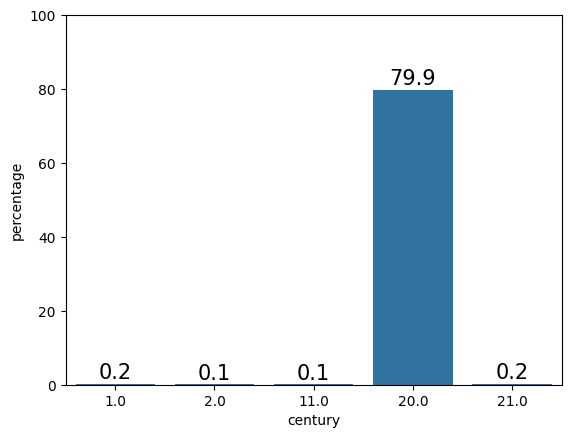

In [22]:

query = """SELECT FLOOR(COALESCE(first_entry, last_entry) / 100) + 1 AS century,
COUNT(*) AS publications_count
FROM sb_kadoc
GROUP BY century """
df2 = pd.read_sql(query, conn)
total_publications = df2['publications_count'].sum()
df2['percentage'] = df2['publications_count'].apply(lambda x: 100 * x / total_publications)


barplot = sns.barplot(x='century', y='percentage', data=df2)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2., 
                    bar.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 8), 
                   textcoords = 'offset points')

plt.ylim(0,100)
plt.show()




<Axes: xlabel='year', ylabel='publications_count'>

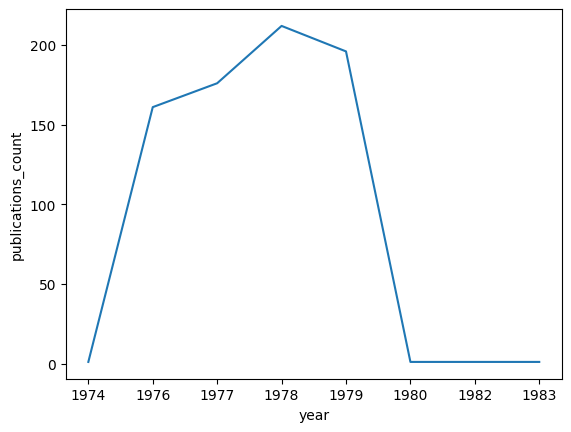

In [6]:
query = """ SELECT COALESCE(first_entry, last_entry) AS year,
COUNT(*) AS publications_count
FROM sb_kadoc
WHERE (COALESCE(first_entry, last_entry) >= 1900) AND (COALESCE(first_entry, last_entry) < 2000)
GROUP BY year
ORDER BY year ASC"""

df3 = pd.read_sql(query, conn)
sns.lineplot(df3, x='year', y='publications_count')

In [23]:
query = """ SELECT COALESCE(first_entry, last_entry) AS year,
COUNT(*) AS publications_count
FROM sb_kadoc
WHERE (COALESCE(first_entry, last_entry) = 1978)
GROUP BY year
ORDER BY year ASC"""

pd.read_sql(query, conn)

,year,publications_count
0,1978,212


In [30]:
query = """ SELECT DISTINCT Title_information AS 'Title',
COUNT(*) AS 'total publications'
FROM sb_kadoc
WHERE Title_information IS NOT NULL
GROUP BY Title_information
HAVING COUNT(*) > 1
ORDER BY COUNT(*) DESC"""

df4 = pd.read_sql(query, conn)
df4.to_csv('title.csv')

In [29]:
query = """ SELECT DISTINCT Title_information AS 'Title',
COUNT(*) AS 'total publications'
FROM sb_kadoc
GROUP BY Title_information
HAVING COUNT(*) > 1
ORDER BY COUNT(*) DESC"""

pd.read_sql(query, conn)

,Title,total publications
0,Kleine Raak,5
1,None,4
2,Kontakt,3
3,Ieder Zijn Zeg,3
4,Contact,3
5,'t Krantje,3
6,'t Schrijverke,2
7,Info Kasterlee,2
8,'t Egeltje,2
9,Telex,2


C:\Users\lean\AppData\Local\Temp\ipykernel_15348\146897089.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


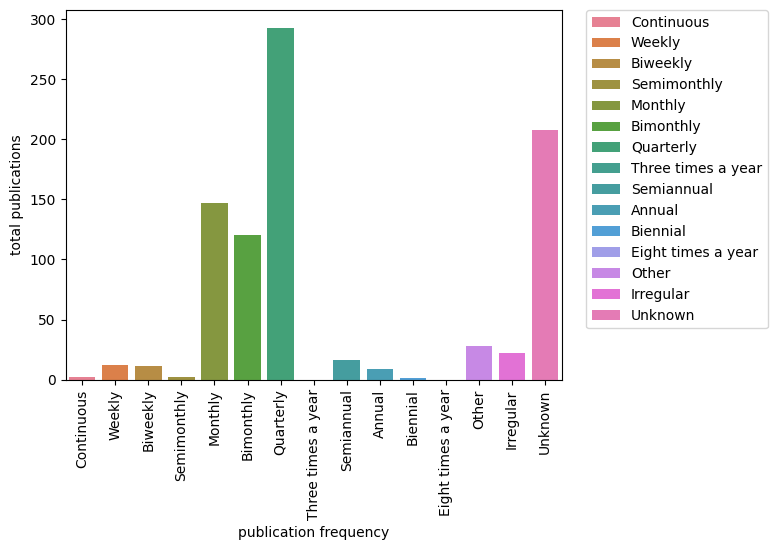

In [6]:
query = """SELECT DISTINCT publication_frequency_cleaned AS 'publication frequency', COUNT(*) AS 'total publications'
FROM sb_kadoc
GROUP BY publication_frequency_cleaned
ORDER BY COUNT(*) DESC""" 

df4 = pd.read_sql(query, conn)
freq_order = ['Continuous', 'Weekly', 'Biweekly', 'Semimonthly', 'Monthly', 'Bimonthly',
               'Quarterly', 'Three times a year', 'Semiannual', 'Annual', 'Biennial',
               'Eight times a year', 'Other', 'Irregular', 'Unknown']
ax = sns.barplot(df4, x='publication frequency', y='total publications', hue='publication frequency', order=freq_order, hue_order=freq_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [7]:
query = """SELECT DISTINCT publication_frequency_cleaned AS 'publication frequency', 
COUNT(*) AS 'total publications',
CAST(COUNT(*) AS DECIMAL) / SUM(COUNT(*)) OVER () * 100 AS 'percentage'
FROM sb_kadoc
GROUP BY publication_frequency_cleaned
ORDER BY COUNT(*) DESC
"""

pd.read_sql(query, conn)

,publication frequency,total publications,percentage
0,Quarterly,293,31.2367
1,Unknown,208,22.1748
2,Monthly,147,15.6716
3,Bimonthly,120,12.7932
4,None,50,5.3305
5,Other,28,2.9851
6,Irregular,22,2.3454
7,Three Times A Year,16,1.7058
8,Semiannual,16,1.7058
9,Weekly,12,1.2793


In [14]:
query = """SELECT DISTINCT Owner_entity, COUNT(*)
FROM sb_kadoc
GROUP BY Owner_entity
ORDER BY COUNT(*) DESC"""

df5 = pd.read_sql(query, conn)
df5.to_csv('allpublishers.csv')

In [12]:
query = """SELECT DISTINCT Owner_entity, COUNT(*)
FROM sb_kadoc
WHERE Owner_entity IS NULL
GROUP BY Owner_entity
ORDER BY COUNT(*) DESC"""

pd.read_sql(query, conn)

,Owner_entity,COUNT(*)
0,None,300
